# PART B: Deep LEARNING 
##    a) Implement an image classifier using a deep learning network. 
##    b) use the MNIST dataset

## Lum Kok Keong 	(T7320307)
## Thia Yu-Kai 		(T7320305)
## Yeo Xin Mei 		(T7320311)

## NSDAI2 Class 2 (Thursday)


# Load the Data

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
import numpy
K.set_image_dim_ordering('th')
seed = 88
numpy.random.seed(seed)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


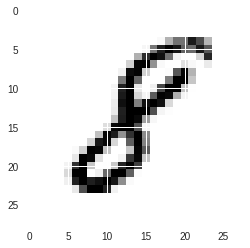

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

#selecting a random image from the dataset
image_index = 7777 

# print the label
print(y_train[image_index])

#show the image
plt.imshow(x_train[image_index], cmap='Greys') 

In [19]:
#show the shape of the data set
x_train.shape

(60000, 28, 28)

# Normalize the data

In [20]:
from keras.utils import np_utils


# flatten 28*28 images to a 784 vector for each image
# reshaping the data so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
print(num_classes)

x_train shape: (60000, 1, 28, 28)
Number of images in x_train 60000
Number of images in x_test 10000
10


# Create and Build the Model - Flatten layer Add Dense to 256,192,128 & 64

In [0]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()

# 2D convolution layer with 28 nodes at the 1st layer, kernel size of 5,5 = 5x5 filter matrix
model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))

# pooling layer to reduce the spatial size of the representation to reduce the parameter counts which 
# reduces the computational complexity
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Dropout layers fight with the overfitting by disregarding some of the neurons
model.add(Dropout(0.1))
#Flatten layers flatten 2D arrays to 1D array for fully connected layers
model.add(Flatten()) 
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dense(192, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(64, activation=tf.nn.relu))

#final Dense layer must have 10 neurons
model.add(Dense(num_classes,activation=tf.nn.softmax))



# Compile and Fit the Model

In [40]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.1700 - acc: 0.9466 - val_loss: 0.0654 - val_acc: 0.9797
Epoch 2/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0625 - acc: 0.9816 - val_loss: 0.0435 - val_acc: 0.9882
Epoch 3/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0498 - acc: 0.9857 - val_loss: 0.0395 - val_acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0417 - acc: 0.9879 - val_loss: 0.0561 - val_acc: 0.9831
Epoch 5/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0337 - acc: 0.9904 - val_loss: 0.0346 - val_acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0295 - acc: 0.9913 - val_loss: 0.0354 - val_acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0264 - acc: 0.9921 - val_loss: 0.

# Evaluate the Model

In [41]:
scores = model.evaluate(x_test, y_test)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

10000/10000 [==============================] - 1s 83us/step
CNN Error: 0.95%


# Sample Test 1 of model on data

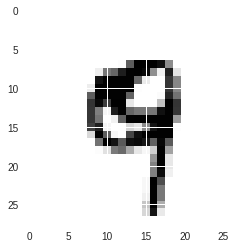

In [31]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')


In [32]:
pred = model.predict(x_test[image_index].reshape(1, 1, 28, 28))
print(pred.argmax())

9


# Sample Test 2 of model on data

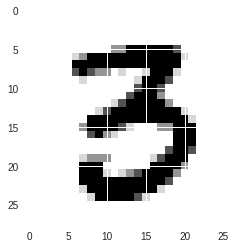

In [33]:
image_index = 5555
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

In [34]:
pred = model.predict(x_test[image_index].reshape(1, 1, 28, 28))
print(pred.argmax())

3


The objective of this task is to implement an image classifier using a deep learning network. After the completion of the training of the model, it should be able to predict numbers from images with a high level of accuracy.

The data was split into training as well as test data, where x_train and x_test contain greyscale RGB codes (from 0 to 255), while y_train and y_test data contains the labels of the images. We then normalize the input data from 0-255 to 0-1 by 1st converting the x_train and x_test to float and then dividing the x_train and x_test by 255.

After which, the data was reshaped to 4D so that it can with the Keras API.

We selected Convolutional Neural Network (CNN) as it is primarily used for image processing. This was done by importing the Sequential model from Keras and adding layers to the sequential model such as Convolution Layer 2D. Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2. Next we added a flatten layer flatten 2D arrays to 1D array before building the fully connected layers.Next 2 fully connected layers with 128 neurons and 64 neurons repectively and rectifier activation function. The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

The model was then trained using logarithmic loss and the ADAM gradient descent algorithm.

We evaluate the model with the multi-layer perceptron. The CNN was fitted over 5 epochs. This gave us an accuracy of 98.26%.